In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import matplotlib as mpl
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv("/Users/Shanti/Desktop/train_ultimo_per.csv")


In [4]:
data.dtypes

customer_ID     object
P_2            float64
D_39           float64
B_1            float64
B_2            float64
                ...   
D_120          float64
D_126            int64
D_63            object
D_64            object
D_68           float64
Length: 170, dtype: object

Categoricas que hay que usar:B_30, B_38, D_114, D_117, D_120, D_126, D_63, D_64, D_68

In [5]:
#Pasar a object las categoricas
data['B_30'] =  data['B_30'].astype(str)
data['B_38'] =  data['B_38'].astype(str)
data['D_114'] =  data['D_114'].astype(str)
data['D_117'] =  data['D_117'].astype(str)
data['D_120'] =  data['D_120'].astype(str)
data['D_126'] =  data['D_126'].astype(str)
data['D_63'] =  data['D_63'].astype(str)
data['D_64'] =  data['D_64'].astype(str)
data['D_68'] =  data['D_68'].astype(str)

In [6]:
print(f"B_30= {data['B_30'].unique()}")
print(f"B_38= {data['B_38'].unique()}")
print(f"D_114= {data['D_114'].unique()}")
print(f"D_117= {data['D_117'].unique()}")
print(f"D_120= {data['D_120'].unique()}")
print(f"D_126= {data['D_126'].unique()}")
print(f"D_63= {data['D_63'].unique()}")
print(f"D_64= {data['D_64'].unique()}")
print(f"D_68= {data['D_68'].unique()}")

B_30= ['0.0' '1.0' '2.0' 'nan']
B_38= ['2.0' '1.0' '3.0' '7.0' '5.0' '6.0' '4.0' 'nan']
D_114= ['1.0' '0.0' 'nan']
D_117= ['4.0' '-1.0' '6.0' '1.0' '2.0' '5.0' '3.0' 'nan']
D_120= ['0.0' '1.0' 'nan']
D_126= ['1' '0']
D_63= ['CR' 'CO' 'CL' 'XL' 'XZ' 'XM']
D_64= ['O' 'R' 'U' 'nan']
D_68= ['6.0' '3.0' '5.0' '4.0' '2.0' '1.0' 'nan']


### Análisis tipo de variables

In [7]:
#Variables categóricas

string_variables = data.select_dtypes(include = 'object').columns.values
(len(string_variables), string_variables)


(10,
 array(['customer_ID', 'B_30', 'B_38', 'D_114', 'D_117', 'D_120', 'D_126',
        'D_63', 'D_64', 'D_68'], dtype=object))

In [8]:
#Variables numéricas

number_variables = data.select_dtypes(include = 'number').columns.values
(len(number_variables), number_variables)

(160,
 array(['P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_42',
        'D_43', 'D_44', 'B_4', 'D_45', 'B_5', 'R_2', 'D_46', 'D_47',
        'D_48', 'B_6', 'B_7', 'B_8', 'D_50', 'D_51', 'B_9', 'R_3', 'D_52',
        'P_3', 'B_10', 'D_53', 'S_5', 'B_11', 'S_6', 'D_54', 'R_4', 'S_7',
        'B_12', 'S_8', 'D_55', 'D_56', 'B_13', 'R_5', 'D_58', 'S_9',
        'B_14', 'D_59', 'D_60', 'D_61', 'B_15', 'S_11', 'D_62', 'D_65',
        'B_16', 'B_17', 'B_18', 'B_19', 'B_20', 'S_12', 'R_6', 'S_13',
        'B_21', 'D_69', 'B_22', 'D_70', 'D_71', 'D_72', 'S_15', 'B_23',
        'P_4', 'D_74', 'D_75', 'D_76', 'B_24', 'R_7', 'D_77', 'B_25',
        'B_26', 'D_78', 'D_79', 'R_8', 'S_16', 'D_80', 'R_10', 'R_11',
        'B_27', 'D_81', 'D_82', 'S_17', 'R_12', 'B_28', 'R_13', 'D_83',
        'R_14', 'R_15', 'D_84', 'R_16', 'S_18', 'D_86', 'D_87', 'R_17',
        'R_18', 'B_31', 'S_19', 'R_19', 'B_32', 'S_20', 'R_20', 'R_21',
        'B_33', 'D_89', 'R_22', 'R_23', 'D_91', 'D_92', 'D_9

In [9]:
#Verificar que checamos todos los tipos de variables

if (sum([len(number_variables), len(string_variables)]) == data.shape[1]): 
    print('Completo')
else:
    print('Faltan columnas')

Completo


#Generar el reporte
profile = ProfileReport(data, title="Pandas Profiling Reportv AMEX")
profile.to_notebook_iframe()
#Guardamos la salida en un archivo html
profile.to_file("/Users/Shanti/Desktop/Amex_data_profiling.html")

## Genera el data profiling de las variables 

#### Categoricas

In [9]:
def get_repeated_values(df, col, top):
    top_5 = df.groupby([col])[col]\
                    .count()\
                    .sort_values(ascending = False)\
                    .head()
    indexes_top_5 = top_5.index
    
    if ((top == 1) and (len(indexes_top_5) > 0)):
        return indexes_top_5[0]
    elif ((top == 2) and (len(indexes_top_5) > 1)):
        return indexes_top_5[1]
    elif ((top == 3) and (len(indexes_top_5) > 2)):
        return indexes_top_5[2]
    else: 
        return 'undefined'

In [10]:
def category_profiling(df, col, profiling_dict):
    """
    Profiling for categoric columns. 
    
    :param: column to analyze
    :return: dictionary
    """
    profiling = {}

    profiling.update({'mode': df[col].mode()[0],
                     'num_categories': df[col].nunique(),
                     'categories': df[col].unique(),
                     #'uniques': df[col].nunique(),
                     'missings': sum(df[col].isna())/df[col].size*100,
                     'top1_repeated': get_repeated_values(df, col, 1),
                     'top2_repeated': get_repeated_values(df, col, 2),
                     'top3_repeated': get_repeated_values(df, col, 3)})
    
    profiling_dict.update({col: profiling})
    
    return profiling_dict

In [11]:
profiling_category_dict = {}

category_profiling_output = [category_profiling(data, elem, profiling_category_dict)\
                             for elem in string_variables]

In [12]:
#category_profiling_output

df_category_profiling = pd.DataFrame(category_profiling_output[0]).reset_index()
df_category_profiling

,index,customer_ID,B_30,B_38,D_114,D_117,D_120,D_126,D_63,D_64,D_68
0,mode,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.0,2.0,1.0,-1.0,0.0,1,CO,O,6.0
1,num_categories,458913,4,8,3,8,3,2,6,4,7
2,categories,[0000099d6bd597052cdcda90ffabf56573fe9d7c79be5...,"[0.0, 1.0, 2.0, nan]","[2.0, 1.0, 3.0, 7.0, 5.0, 6.0, 4.0, nan]","[1.0, 0.0, nan]","[4.0, -1.0, 6.0, 1.0, 2.0, 5.0, 3.0, nan]","[0.0, 1.0, nan]","[1, 0]","[CR, CO, CL, XL, XZ, XM]","[O, R, U, nan]","[6.0, 3.0, 5.0, 4.0, 2.0, 1.0, nan]"
3,missings,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,top1_repeated,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.0,2.0,1.0,-1.0,0.0,1,CO,O,6.0
5,top2_repeated,aab6cd60f43333ffbf74b6500af488da9966c9c5d7bb50...,1.0,3.0,0.0,3.0,1.0,0,CR,U,5.0
6,top3_repeated,aa5f0a0add6369c75c051f901120fbf459925ba2b4a813...,2.0,1.0,nan,4.0,nan,undefined,CL,R,3.0


In [10]:
print(f"B_30= {data['B_30'].isna().sum()}")
print(f"B_38= {data['B_38'].isna().sum()}")
print(f"D_114= {data['D_114'].isna().sum()}")
print(f"D_117= {data['D_117'].isna().sum()}")
print(f"D_120= {data['D_120'].isna().sum()}")
print(f"D_126= {data['D_126'].isna().sum()}")
print(f"D_63= {data['D_63'].isna().sum()}")
print(f"D_64= {data['D_64'].isna().sum()}")
print(f"D_68= {data['D_68'].isna().sum()}")

B_30= 0
B_38= 0
D_114= 0
D_117= 0
D_120= 0
D_126= 0
D_63= 0
D_64= 0
D_68= 0


#Reemplazamos todos los nan por other de las categoricas
data['B_30'].fillna('other',inplace=True)
data['B_38'].fillna('other',inplace=True)
data['D_114'].fillna('other',inplace=True)
data['D_117'].fillna('other',inplace=True)
data['D_120'].fillna('other',inplace=True)
data['D_126'].fillna('other',inplace=True)
data['D_63'].fillna('other',inplace=True)
data['D_64'].fillna('other',inplace=True)
data['D_68'].fillna('other',inplace=True)



print(f"B_30= {data['B_30'].isna().sum()}")
print(f"B_38= {data['B_38'].isna().sum()}")
print(f"D_114= {data['D_114'].isna().sum()}")
print(f"D_117= {data['D_117'].isna().sum()}")
print(f"D_120= {data['D_120'].isna().sum()}")
print(f"D_126= {data['D_126'].isna().sum()}")
print(f"D_63= {data['D_63'].isna().sum()}")
print(f"D_64= {data['D_64'].isna().sum()}")
print(f"D_68= {data['D_68'].isna().sum()}")

#### Numericas

In [14]:
# con talacha
def numeric_profiling(df, col, profiling_dict):
    """
    Profiling for numeric columns. 
    
    :param: column to analyze
    :return: dictionary
    """
    profiling = {}

    profiling.update({'max': df[col].max(),
                     'min': df[col].min(),
                     'mean': df[col].mean(),
                     'stdv': df[col].std(),
                     '25%': df[col].quantile(.25),
                     'median': df[col].median(),
                     '75%': df[col].quantile(.75),
                     'kurtosis': df[col].kurt(),
                     'skewness': df[col].skew(),
                     'uniques': df[col].nunique(),
                     'prop_missings': sum(df[col].isna())/df[col].size*100,
                     'top1_repeated': get_repeated_values(df, col, 1),
                     'top2_repeated': get_repeated_values(df, col, 2),
                     'top3_repeated': get_repeated_values(df, col, 3)})
    
    profiling_dict.update({col: profiling})
    
    return profiling_dict

In [15]:
profiling_dict = {}

numeric_profiling_output = [numeric_profiling(data, elem, profiling_dict)\
                            for elem in number_variables]

In [16]:
df_numeric_profiling = pd.DataFrame(numeric_profiling_output[0]).reset_index()
df_numeric_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_numeric_profiling

,metric,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_131,D_133,R_28,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,max,1.009998,5.001550e+00,1.324059,1.010000e+00,2.759738e+00,3.993525,8.988807e+00,1.596532e+00,4.186138,...,1.491624e+00,1.509998e+00,1.009960e+00,1.010000e+00,1.010000e+00,1.339910e+00,2.229182,1.010000e+00,1.343326e+00,4.827630e+00
1,min,-0.458955,7.406592e-08,-3.571172,2.024839e-07,5.646122e-08,-0.508883,3.998730e-08,7.574315e-08,-0.000240,...,5.461693e-09,1.243154e-09,4.549750e-08,2.207831e-08,7.897955e-09,9.490087e-08,-0.011438,1.653580e-08,1.995319e-08,2.811854e-09
2,mean,0.635249,2.014895e-01,0.139027,5.916128e-01,1.073958e-01,0.229064,9.948801e-02,1.548291e-01,0.177988,...,1.167025e-01,5.146633e-02,5.660658e-03,1.811025e-01,2.893126e-02,1.665783e-01,0.394761,1.809953e-01,5.201583e-02,6.379602e-02
3,stdv,0.267547,4.021565e-01,0.231266,4.121456e-01,2.786386e-01,0.198845,3.040705e-01,2.550615e-01,0.253631,...,3.122695e-01,1.828866e-01,2.588725e-02,3.809093e-01,1.528808e-01,3.501717e-01,0.241254,3.808317e-01,1.820323e-01,1.970930e-01
4,25%,0.449332,4.782223e-03,0.008984,7.091162e-02,2.957326e-03,0.127512,3.008724e-03,5.483745e-03,0.031770,...,2.823318e-03,2.754521e-03,2.504165e-03,3.045516e-03,2.551175e-03,3.027869e-03,0.200727,3.032092e-03,2.757897e-03,3.031604e-03
5,median,0.682559,9.559730e-03,0.033219,8.134054e-01,5.920879e-03,0.164910,6.010615e-03,1.082996e-02,0.108293,...,5.645906e-03,5.517986e-03,4.998674e-03,6.078699e-03,5.120597e-03,6.050620e-03,0.386107,6.065281e-03,5.501409e-03,6.072661e-03
6,75%,0.862186,2.665587e-01,0.153634,1.001955e+00,8.891468e-03,0.264784,8.998209e-03,2.106605e-01,0.230394,...,8.457952e-03,8.264314e-03,7.498714e-03,9.101306e-03,7.674505e-03,9.101263e-03,0.573958,9.097647e-03,8.251762e-03,9.101820e-03
7,kurtosis,-0.219455,1.639678e+01,6.711370,-1.619576e+00,1.205459e+01,15.680271,3.816850e+01,3.152123e+00,46.848990,...,3.954958e+00,2.575421e+01,1.467481e+03,8.923334e-01,3.677881e+01,9.703298e-01,0.271645,8.953719e-01,2.030650e+01,4.065024e+01
8,skewness,-0.681382,3.595900e+00,2.491184,-4.205407e-01,3.288562e+00,3.060651,5.165237e+00,1.945054e+00,5.234599,...,2.438966e+00,4.843087e+00,3.809447e+01,1.700569e+00,6.226026e+00,1.715385e+00,0.458831,1.701462e+00,4.439640e+00,5.471476e+00
9,uniques,455944.000000,4.589130e+05,458913.000000,4.588820e+05,4.589130e+05,373943.000000,4.588820e+05,4.588820e+05,59910.000000,...,4.560830e+05,4.589130e+05,4.589130e+05,4.560830e+05,4.589130e+05,4.560830e+05,80315.000000,4.560830e+05,4.589130e+05,4.560830e+05


#Contar cuantas observaciones vacías tienen las variables numericas
print(f"P_2= {data['P_2'].isna().sum()}")
print(f"D_39= {data['D_39'].isna().sum()}")
print(f"B_1= {data['B_1'].isna().sum()}")
print(f"B_2= {data['B_2'].isna().sum()}")
print(f"R_1= {data['R_1'].isna().sum()}")
print(f"S_3= {data['S_3'].isna().sum()}")
print(f"B_3= {data['B_3'].isna().sum()}")
print(f"D_42= {data['D_42'].isna().sum()}")
print(f"D_43= {data['D_43'].isna().sum()}")
print(f"D_44= {data['D_44'].isna().sum()}")
print(f"B_4= {data['B_4'].isna().sum()}")
print(f"B_5= {data['B_5'].isna().sum()}")
print(f"R_2= {data['R_2'].isna().sum()}")
print(f"D_46= {data['D_46'].isna().sum()}")
print(f"D_47= {data['D_47'].isna().sum()}")
print(f"D_48= {data['D_48'].isna().sum()}")
print(f"B_6= {data['B_6'].isna().sum()}")
print(f"B_7= {data['B_7'].isna().sum()}")
print(f"B_8= {data['B_8'].isna().sum()}")
print(f"D_50= {data['D_50'].isna().sum()}")
print(f"D_51= {data['D_51'].isna().sum()}")
print(f"B_9= {data['B_9'].isna().sum()}")
print(f"R_3= {data['R_3'].isna().sum()}")
print(f"D_52= {data['D_52'].isna().sum()}")
print(f"P_3= {data['P_3'].isna().sum()}")
print(f"B_10= {data['B_10'].isna().sum()}")
print(f"D_53= {data['D_53'].isna().sum()}")
print(f"S_5= {data['S_5'].isna().sum()}")
print(f"B_11= {data['B_11'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"D_54= {data['D_54'].isna().sum()}")
print(f"R_4= {data['R_4'].isna().sum()}")
print(f"S_7= {data['S_7'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")
print(f"S_6= {data['S_6'].isna().sum()}")

1. ¿Cuál es la variable target? Churn

**Es peor decir que no se salen los clientes cuando sí**

- Etiqueta Positiva= Sí abandona la compañía
- Etiqueta Negativa= No abandona la compañía 
- TP= el modelos dice que abandona y la etiqueta real dice que sí abandona
- TN= el modelo dice que no abondona y la etiqueta real dice que no abondona
- FN= el modelo dice que no abandona y la etiqueta real dice que sí abandona -> **Queremos reducir esta**
- FP=el modelo dice que sí abandona y la etiqueta real dice que no abandona

**Debemos optimizar: minimizar FN
Minimizar los FN porque le sale más caro a una empresa pensar que sí cuenta con esos clientes cuando en realidad ya no. 

**¿Qué métrica de desempeño deberás optimizar para cumplir con el punto anterior**

Nos importa más **Recall** =TP/(TP+FN). Esta métrica la ocupamos cuando en el contexto de negocio del problema es más conveniente minimizar los falsos negativos. Consideramos también que era mejor ocupar **recall**, ya que sirve para modelos en los que se quiere hacer intervenciones positivas. En este caso, queremos predecir estos clientes que se quieren ir y evitar que se vayan.

In [11]:
data_trainlabels = pd.read_csv("/Users/Shanti/Desktop/train_labels.csv")
data_trainlabels.dtypes

customer_ID    object
target          int64
dtype: object

In [12]:
data_trainlabels.shape[0]

458913

In [13]:
data_trainlabels.head(3)

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0


In [14]:
data.head(3)

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_145,B_30,B_38,D_114,D_117,D_120,D_126,D_63,D_64,D_68
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.934745,0.009119,0.009382,1.007647,0.006104,0.135021,0.001604,0.007174,NaN,...,0.008533,0.0,2.0,1.0,4.0,0.0,1,CR,O,6.0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.880519,0.178126,0.034684,1.004028,0.006911,0.165509,0.005552,0.005068,NaN,...,0.008514,0.0,2.0,1.0,-1.0,0.0,1,CO,O,6.0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.880875,0.009704,0.004284,0.812650,0.006450,NaN,0.003796,0.007196,NaN,...,0.003444,0.0,1.0,1.0,-1.0,0.0,1,CO,R,6.0


In [15]:
data.shape[0]

458913

In [16]:
#Unir target variable al dataset
data_full=data_trainlabels.merge(data,how='inner',left_on='customer_ID', right_on='customer_ID')
data_full.head(3)

,customer_ID,target,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_145,B_30,B_38,D_114,D_117,D_120,D_126,D_63,D_64,D_68
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.934745,0.009119,0.009382,1.007647,0.006104,0.135021,0.001604,0.007174,...,0.008533,0.0,2.0,1.0,4.0,0.0,1,CR,O,6.0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0,0.880519,0.178126,0.034684,1.004028,0.006911,0.165509,0.005552,0.005068,...,0.008514,0.0,2.0,1.0,-1.0,0.0,1,CO,O,6.0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0,0.880875,0.009704,0.004284,0.812650,0.006450,NaN,0.003796,0.007196,...,0.003444,0.0,1.0,1.0,-1.0,0.0,1,CO,R,6.0


### Preprocesamiento

Categoricas que hay que usar:B_30, B_38, D_114, D_117, D_120, D_126, D_63, D_64, D_68

In [17]:
ohe = OneHotEncoder()

In [18]:
# Le pasamos las variables que queremos cambiar:
database_aux=data_full[['B_30', 'B_38', 'D_114', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_68']]
database_aux
X_ohe =ohe.fit(database_aux)
X_ohe_t=X_ohe.transform(database_aux)
X_ohe_t.toarray()

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [19]:
#database_aux.isnull().any()


In [20]:
database_aux.dtypes

B_30     object
B_38     object
D_114    object
D_117    object
D_120    object
D_126    object
D_63     object
D_64     object
D_68     object
dtype: object

In [21]:
X_ohe.get_feature_names()

array(['x0_0.0', 'x0_1.0', 'x0_2.0', 'x0_nan', 'x1_1.0', 'x1_2.0',
       'x1_3.0', 'x1_4.0', 'x1_5.0', 'x1_6.0', 'x1_7.0', 'x1_nan',
       'x2_0.0', 'x2_1.0', 'x2_nan', 'x3_-1.0', 'x3_1.0', 'x3_2.0',
       'x3_3.0', 'x3_4.0', 'x3_5.0', 'x3_6.0', 'x3_nan', 'x4_0.0',
       'x4_1.0', 'x4_nan', 'x5_0', 'x5_1', 'x6_CL', 'x6_CO', 'x6_CR',
       'x6_XL', 'x6_XM', 'x6_XZ', 'x7_O', 'x7_R', 'x7_U', 'x7_nan',
       'x8_1.0', 'x8_2.0', 'x8_3.0', 'x8_4.0', 'x8_5.0', 'x8_6.0',
       'x8_nan'], dtype=object)

In [22]:
print(f"B_30= {data['B_30'].unique()}")
print(f"B_38= {data['B_38'].unique()}")
print(f"D_114= {data['D_114'].unique()}")
print(f"D_117= {data['D_117'].unique()}")
print(f"D_120= {data['D_120'].unique()}")
print(f"D_126= {data['D_126'].unique()}")
print(f"D_63= {data['D_63'].unique()}")
print(f"D_64= {data['D_64'].unique()}")
print(f"D_68= {data['D_68'].unique()}")

B_30= ['0.0' '1.0' '2.0' 'nan']
B_38= ['2.0' '1.0' '3.0' '7.0' '5.0' '6.0' '4.0' 'nan']
D_114= ['1.0' '0.0' 'nan']
D_117= ['4.0' '-1.0' '6.0' '1.0' '2.0' '5.0' '3.0' 'nan']
D_120= ['0.0' '1.0' 'nan']
D_126= ['1' '0']
D_63= ['CR' 'CO' 'CL' 'XL' 'XZ' 'XM']
D_64= ['O' 'R' 'U' 'nan']
D_68= ['6.0' '3.0' '5.0' '4.0' '2.0' '1.0' 'nan']


In [23]:
df_ohe = pd.DataFrame(list(X_ohe_t.toarray()), columns=['x0_0.0', 'x0_1.0', 'x0_2.0', 'x0_nan', 'x1_1.0', 'x1_2.0',
       'x1_3.0', 'x1_4.0', 'x1_5.0', 'x1_6.0', 'x1_7.0', 'x1_nan',
       'x2_0.0', 'x2_1.0', 'x2_nan', 'x3_-1.0', 'x3_1.0', 'x3_2.0',
       'x3_3.0', 'x3_4.0', 'x3_5.0', 'x3_6.0', 'x3_nan', 'x4_0.0',
       'x4_1.0', 'x4_nan', 'x5_0', 'x5_1', 'x6_CL', 'x6_CO', 'x6_CR',
       'x6_XL', 'x6_XM', 'x6_XZ', 'x7_O', 'x7_R', 'x7_U', 'x7_nan',
       'x8_1.0', 'x8_2.0', 'x8_3.0', 'x8_4.0', 'x8_5.0', 'x8_6.0',
       'x8_nan'])

df_ohe

,x0_0.0,x0_1.0,x0_2.0,x0_nan,x1_1.0,x1_2.0,x1_3.0,x1_4.0,x1_5.0,x1_6.0,...,x7_R,x7_U,x7_nan,x8_1.0,x8_2.0,x8_3.0,x8_4.0,x8_5.0,x8_6.0,x8_nan
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
458909,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
458910,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
458911,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [24]:
df_ohe.dtypes

x0_0.0     float64
x0_1.0     float64
x0_2.0     float64
x0_nan     float64
x1_1.0     float64
x1_2.0     float64
x1_3.0     float64
x1_4.0     float64
x1_5.0     float64
x1_6.0     float64
x1_7.0     float64
x1_nan     float64
x2_0.0     float64
x2_1.0     float64
x2_nan     float64
x3_-1.0    float64
x3_1.0     float64
x3_2.0     float64
x3_3.0     float64
x3_4.0     float64
x3_5.0     float64
x3_6.0     float64
x3_nan     float64
x4_0.0     float64
x4_1.0     float64
x4_nan     float64
x5_0       float64
x5_1       float64
x6_CL      float64
x6_CO      float64
x6_CR      float64
x6_XL      float64
x6_XM      float64
x6_XZ      float64
x7_O       float64
x7_R       float64
x7_U       float64
x7_nan     float64
x8_1.0     float64
x8_2.0     float64
x8_3.0     float64
x8_4.0     float64
x8_5.0     float64
x8_6.0     float64
x8_nan     float64
dtype: object

In [25]:
#Añadimos las otras variables, las numericas
df_ohe['P_2'] = data_full.P_2
df_ohe['D_39'] = data_full.D_39
df_ohe['B_1'] = data_full.B_1
df_ohe['B_2'] = data_full.B_2
df_ohe['R_1'] = data_full.R_1
df_ohe['S_3'] = data_full.S_3
df_ohe['D_41'] = data_full.D_41
df_ohe['B_3'] = data_full.B_3
df_ohe['D_42'] = data_full.D_42
df_ohe['D_43'] = data_full.D_43
df_ohe['D_44'] = data_full.D_44
df_ohe['B_4'] = data_full.B_4
df_ohe['D_45'] = data_full.D_45
df_ohe['B_5'] = data_full.B_5
df_ohe['R_2'] = data_full.R_2
df_ohe['D_46'] = data_full.D_46
df_ohe['D_47'] = data_full.D_47
df_ohe['D_48'] = data_full.D_48
df_ohe['B_6'] = data_full.B_6
df_ohe['B_7'] = data_full.B_7
df_ohe['B_8'] = data_full.B_8
df_ohe['D_50'] = data_full.D_50
df_ohe['D_51'] = data_full.D_51
df_ohe['B_9'] = data_full.B_9
df_ohe['R_3'] = data_full.R_3
df_ohe['D_52'] = data_full.D_52
df_ohe['P_3'] = data_full.P_3
df_ohe['B_10'] = data_full.B_10
df_ohe['D_53'] = data_full.D_53
df_ohe['S_5'] = data_full.S_5
df_ohe['B_11'] = data_full.B_11
df_ohe['S_6'] = data_full.S_6
df_ohe['D_54'] = data_full.D_54
df_ohe['R_4'] = data_full.R_4
df_ohe['S_7'] = data_full.S_7
df_ohe['B_12'] = data_full.B_12
df_ohe['S_8'] = data_full.S_8
df_ohe['D_55'] = data_full.D_55
df_ohe['D_56'] = data_full.D_56
df_ohe['B_13'] = data_full.B_13
df_ohe['R_5'] = data_full.R_5
df_ohe['D_58'] = data_full.D_58
df_ohe['S_9'] = data_full.S_9
df_ohe['B_14'] = data_full.B_14
df_ohe['D_59'] = data_full.D_59
df_ohe['D_60'] = data_full.D_60
df_ohe['D_61'] = data_full.D_61
df_ohe['B_15'] = data_full.B_15
df_ohe['S_11'] = data_full.S_11
df_ohe['D_62'] = data_full.D_62
df_ohe['D_65'] = data_full.D_65
df_ohe['B_16'] = data_full.B_16
df_ohe['B_17'] = data_full.B_17
df_ohe['B_18'] = data_full.B_18
df_ohe['B_19'] = data_full.B_19
df_ohe['B_20'] = data_full.B_20
df_ohe['S_12'] = data_full.S_12
df_ohe['R_6'] = data_full.R_6
df_ohe['S_13'] = data_full.S_13
df_ohe['B_21'] = data_full.B_21
df_ohe['D_69'] = data_full.D_69
df_ohe['B_22'] = data_full.B_22
df_ohe['D_70'] = data_full.D_70
df_ohe['D_71'] = data_full.D_71
df_ohe['D_72'] = data_full.D_72
df_ohe['S_15'] = data_full.S_15
df_ohe['B_23'] = data_full.B_23
df_ohe['P_4'] = data_full.P_4
df_ohe['D_74'] = data_full.D_74
df_ohe['D_75'] = data_full.D_75
df_ohe['D_76'] = data_full.D_76
df_ohe['B_24'] = data_full.B_24
df_ohe['R_7'] = data_full.R_7
df_ohe['D_77'] = data_full.D_77
df_ohe['B_25'] = data_full.B_25
df_ohe['B_26'] = data_full.B_26
df_ohe['D_78'] = data_full.D_78
df_ohe['D_79'] = data_full.D_79
df_ohe['R_8'] = data_full.R_8
df_ohe['S_16'] = data_full.S_16
df_ohe['D_80'] = data_full.D_80
df_ohe['R_10'] = data_full.R_10
df_ohe['R_11'] = data_full.R_11
df_ohe['B_27'] = data_full.B_27
df_ohe['D_81'] = data_full.D_81
df_ohe['D_82'] = data_full.D_82
df_ohe['S_17'] = data_full.S_17
df_ohe['R_12'] = data_full.R_12
df_ohe['B_28'] = data_full.B_28
df_ohe['R_13'] = data_full.R_13
df_ohe['D_83'] = data_full.D_83
df_ohe['R_14'] = data_full.R_14
df_ohe['R_15'] = data_full.R_15
df_ohe['D_84'] = data_full.D_84
df_ohe['R_16'] = data_full.R_16
df_ohe['S_18'] = data_full.S_18
df_ohe['D_86'] = data_full.D_86
df_ohe['D_87'] = data_full.D_87
df_ohe['R_17'] = data_full.R_17
df_ohe['R_18'] = data_full.R_18
df_ohe['B_31'] = data_full.B_31
df_ohe['S_19'] = data_full.S_19
df_ohe['R_19'] = data_full.R_19
df_ohe['B_32'] = data_full.B_32
df_ohe['S_20'] = data_full.S_20
df_ohe['R_20'] = data_full.R_20
df_ohe['R_21'] = data_full.R_21
df_ohe['B_33'] = data_full.B_33
df_ohe['D_89'] = data_full.D_89
df_ohe['R_22'] = data_full.R_22
df_ohe['R_23'] = data_full.R_23
df_ohe['D_91'] = data_full.D_91
df_ohe['D_92'] = data_full.D_92
df_ohe['D_93'] = data_full.D_93
df_ohe['D_94'] = data_full.D_94
df_ohe['R_24'] = data_full.R_24
df_ohe['R_25'] = data_full.R_25
df_ohe['D_96'] = data_full.D_96
df_ohe['S_22'] = data_full.S_22
df_ohe['S_23'] = data_full.S_23
df_ohe['S_24'] = data_full.S_24
df_ohe['S_25'] = data_full.S_25
df_ohe['S_26'] = data_full.S_26
df_ohe['D_102'] = data_full.D_102
df_ohe['D_103'] = data_full.D_103
df_ohe['D_104'] = data_full.D_104
df_ohe['D_105'] = data_full.D_105
df_ohe['D_107'] = data_full.D_107
df_ohe['B_36'] = data_full.B_36
df_ohe['B_37'] = data_full.B_37
df_ohe['R_26'] = data_full.R_26
df_ohe['R_27'] = data_full.R_27
df_ohe['D_109'] = data_full.D_109
df_ohe['D_112'] = data_full.D_112
df_ohe['B_40'] = data_full.B_40
df_ohe['S_27'] = data_full.S_27
df_ohe['D_113'] = data_full.D_113
df_ohe['D_115'] = data_full.D_115
df_ohe['D_118'] = data_full.D_118
df_ohe['D_119'] = data_full.D_119
df_ohe['D_121'] = data_full.D_121
df_ohe['D_122'] = data_full.D_122
df_ohe['D_123'] = data_full.D_123
df_ohe['D_124'] = data_full.D_124
df_ohe['D_125'] = data_full.D_125
df_ohe['D_127'] = data_full.D_127
df_ohe['D_128'] = data_full.D_128
df_ohe['D_129'] = data_full.D_129
df_ohe['B_41'] = data_full.B_41
df_ohe['D_130'] = data_full.D_130
df_ohe['D_131'] = data_full.D_131
df_ohe['D_133'] = data_full.D_133
df_ohe['R_28'] = data_full.R_28
df_ohe['D_139'] = data_full.D_139
df_ohe['D_140'] = data_full.D_140
df_ohe['D_141'] = data_full.D_141
df_ohe['D_142'] = data_full.D_142
df_ohe['D_143'] = data_full.D_143
df_ohe['D_144'] = data_full.D_144
df_ohe['D_145'] = data_full.D_145

df_ohe

,x0_0.0,x0_1.0,x0_2.0,x0_nan,x1_1.0,x1_2.0,x1_3.0,x1_4.0,x1_5.0,x1_6.0,...,D_131,D_133,R_28,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.005702,0.006210,0.002715,0.007186,0.004234,0.005086,NaN,0.005810,0.002970,0.008533
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.001928,0.002996,0.001701,0.002980,0.007479,0.007870,NaN,0.003284,0.003169,0.008514
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.003470,0.009881,0.007691,0.007383,0.006623,0.000964,NaN,0.002202,0.000834,0.003444
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.004576,0.001789,0.005140,0.002704,0.006184,0.001899,NaN,0.008183,0.005560,0.002983
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.008897,0.005045,0.003706,0.002974,0.004162,0.005764,NaN,0.008154,0.006944,0.000905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.009489,0.002072,0.004589,0.007917,0.001520,0.005530,NaN,0.001430,0.003009,0.004843
458909,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.006120,1.128725,0.004884,0.004393,0.006185,0.001480,NaN,0.004794,0.009230,0.006435
458910,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.003282,0.004513,0.008924,0.006035,0.002869,0.002149,NaN,0.008031,0.000340,0.002148
458911,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.002679,0.000479,0.006828,1.009894,0.004478,0.949723,0.446255,1.009310,0.002502,0.185527


In [26]:
df_ohe['target'] = data_full.target

In [27]:
#Checamos que estén todas las varibles y su tipo 
df_ohe.dtypes

x0_0.0    float64
x0_1.0    float64
x0_2.0    float64
x0_nan    float64
x1_1.0    float64
           ...   
D_142     float64
D_143     float64
D_144     float64
D_145     float64
target      int64
Length: 206, dtype: object

# ## Modelado - LightGBM

In [28]:
#Calcular procentaje de los datos con etiqueta positiva

data_full.target.value_counts(normalize=True)

0    0.741066
1    0.258934
Name: target, dtype: float64

El 25.89% de los datos son etiqueta positiva. Es decir, abandonaron la compañía y el 74.10% no abandonó la compañía.

In [29]:
#Variable dependiente/ target
y = df_ohe.target
y.shape

(458913,)

In [30]:
#Variables independientes/ explicativas
X = df_ohe.filter(['x0_0.0', 'x0_1.0', 'x0_2.0', 'x0_nan', 'x1_1.0', 'x1_2.0',
       'x1_3.0', 'x1_4.0', 'x1_5.0', 'x1_6.0', 'x1_7.0', 'x1_nan',
       'x2_0.0', 'x2_1.0', 'x2_nan', 'x3_-1.0', 'x3_1.0', 'x3_2.0',
       'x3_3.0', 'x3_4.0', 'x3_5.0', 'x3_6.0', 'x3_nan', 'x4_0', 'x4_1',
       'x5_0', 'x5_1', 'x6_CL', 'x6_CO', 'x6_CR', 'x6_XL', 'x6_XM',
       'x6_XZ', 'x7_O', 'x7_R', 'x7_U', 'x7_nan', 'x8_1.0', 'x8_2.0',
       'x8_3.0', 'x8_4.0', 'x8_5.0', 'x8_6.0', 'x8_nan','P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_42',
        'D_43', 'D_44', 'B_4', 'D_45', 'B_5', 'R_2', 'D_46', 'D_47',
        'D_48', 'B_6', 'B_7', 'B_8', 'D_50', 'D_51', 'B_9', 'R_3', 'D_52',
        'P_3', 'B_10', 'D_53', 'S_5', 'B_11', 'S_6', 'D_54', 'R_4', 'S_7',
        'B_12', 'S_8', 'D_55', 'D_56', 'B_13', 'R_5', 'D_58', 'S_9',
        'B_14', 'D_59', 'D_60', 'D_61', 'B_15', 'S_11', 'D_62', 'D_65',
        'B_16', 'B_17', 'B_18', 'B_19', 'B_20', 'S_12', 'R_6', 'S_13',
        'B_21', 'D_69', 'B_22', 'D_70', 'D_71', 'D_72', 'S_15', 'B_23',
        'P_4', 'D_74', 'D_75', 'D_76', 'B_24', 'R_7', 'D_77', 'B_25',
        'B_26', 'D_78', 'D_79', 'R_8', 'S_16', 'D_80', 'R_10', 'R_11',
        'B_27', 'D_81', 'D_82', 'S_17', 'R_12', 'B_28', 'R_13', 'D_83',
        'R_14', 'R_15', 'D_84', 'R_16', 'S_18', 'D_86', 'D_87', 'R_17',
        'R_18', 'B_31', 'S_19', 'R_19', 'B_32', 'S_20', 'R_20', 'R_21',
        'B_33', 'D_89', 'R_22', 'R_23', 'D_91', 'D_92', 'D_93', 'D_94',
        'R_24', 'R_25', 'D_96', 'S_22', 'S_23', 'S_24', 'S_25', 'S_26',
        'D_102', 'D_103', 'D_104', 'D_105', 'D_107', 'B_36', 'B_37',
        'R_26', 'R_27', 'D_109', 'D_112', 'B_40', 'S_27', 'D_113', 'D_115',
        'D_118', 'D_119', 'D_121', 'D_122', 'D_123', 'D_124', 'D_125',
        'D_127', 'D_128', 'D_129', 'B_41', 'D_130', 'D_131', 'D_133',
        'R_28', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144',
        'D_145'],axis=1)
X.shape


(458913, 202)

In [31]:
np.random.seed(210418)

In [32]:
from sklearn.model_selection import train_test_split

# train test split usando el 25% de los datos para test
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25)
print("\nX_train, y_train: ", (X_train.shape, y_train.shape))
print("\nX_test, y_test: ", (X_test.shape, y_test.shape))



X_train, y_train:  ((344184, 202), (344184,))

X_test, y_test:  ((114729, 202), (114729,))


En el entrendamiento tenemos 344,184 valores para los predictores y 344,18 para la variable target.

Clasificadores interesenates para probar:
- GradientBoostingClassifier -> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier

- HistGradientBoostingClassifier -> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html#sklearn.ensemble.HistGradientBoostingClassifier---->This estimator is much faster than GradientBoostingClassifier for big datasets (n_samples >= 10 000) and this implementation is inspired by LightGBM. 

Scikit-learn 0.21 introduced two new implementations of gradient boosting trees, namely HistGradientBoostingClassifier and HistGradientBoostingRegressor, inspired by LightGBM (See [LightGBM]).

These histogram-based estimators can be orders of magnitude faster than GradientBoostingClassifier and GradientBoostingRegressor when the number of samples is larger than tens of thousands of samples.

They also have built-in support for missing values, which avoids the need for an imputer.

Scoring: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


In [33]:
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting 
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier

In [34]:
from sklearn.model_selection import ParameterGrid, GridSearchCV
#from sklearn.ensemble import HistGradientBoostingClassifier

dt = HistGradientBoostingClassifier(random_state=5432)

grid = {'min_samples_leaf': [10],'learning_rate': [0.1],'max_depth': [10],'max_iter':[1000],
       'l2_regularization':[1.5]}
# En scoring es la manera en que va a escoger el mejor tree, los más comunes son recall y precision
# n-jobs ayuda a que sea mas eficiente en recursos, en -1 ocupa todo lo que esta disponible

gs = GridSearchCV(dt, param_grid=grid, scoring='recall', cv=5, n_jobs=-1,
                  return_train_score=True)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=HistGradientBoostingClassifier(random_state=5432),
             n_jobs=-1,
             param_grid={'l2_regularization': [1.5], 'learning_rate': [0.1],
                         'max_depth': [10], 'max_iter': [1000],
                         'min_samples_leaf': [10]},
             return_train_score=True, scoring='recall')

##### Co'digo para cuando tengamos mas variaciones en el gridsearch

In [35]:
type(gs)

sklearn.model_selection._search.GridSearchCV

In [36]:
#Encontrar el mejor modelo
gs.best_estimator_ 

HistGradientBoostingClassifier(l2_regularization=1.5, max_depth=10,
                               max_iter=1000, min_samples_leaf=10,
                               random_state=5432)

In [37]:
gs.best_params_

{'l2_regularization': 1.5,
 'learning_rate': 0.1,
 'max_depth': 10,
 'max_iter': 1000,
 'min_samples_leaf': 10}

In [38]:
# obtiene las etiquetas del mejor predictor
predicted_labels = gs.predict(X_test)
predicted_labels[:10]

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0])

In [39]:
# scores asociados
predicted_scores = gs.predict_proba(X_test)
predicted_scores[:10,]

array([[0.99575144, 0.00424856],
       [0.99793527, 0.00206473],
       [0.45559358, 0.54440642],
       [0.63721546, 0.36278454],
       [0.99869693, 0.00130307],
       [0.94229949, 0.05770051],
       [0.02813469, 0.97186531],
       [0.0889589 , 0.9110411 ],
       [0.9452347 , 0.0547653 ],
       [0.99833397, 0.00166603]])

Este es el score asociado a que defaulte o no. Mientras más grande sea, más seguro está el modelo de que corresponde a la etiqueta positiva (defaultea). Mientras más cercano a 0, menos está seguro de que es 1(defaulte) y pone 0 (no defaultea).

La primer columna correpsonde a la etiqueta 0 y la segunda columna a la etiqueta 1.

In [41]:
import time
#El mejor modelo
dt = HistGradientBoostingClassifier(min_samples_leaf=10, learning_rate=0.1,max_depth=10,
                                    max_iter=1000,l2_regularization=1.5, random_state=5432)

start = time.time()
dt.fit(X_train, y_train)

print("Tiempo de ejecución en segundos: {}".format(time.time() - start))

Tiempo de ejecución en segundos: 29.542877912521362


In [42]:
dt.n_features_in_ #Number of features seen during fit.

202

### Métricas de Desempeño

<ipython-input-43-95b877ac174c>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,1],[0,1], 'k--', c="red")


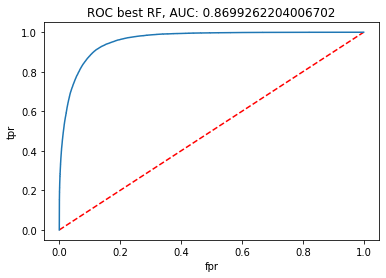

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt

%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, predicted_scores[:,1], pos_label=1)

plt.clf()
plt.plot([0,1],[0,1], 'k--', c="red")
plt.plot(fpr, tpr)
plt.title("ROC best RF, AUC: {}".format(roc_auc_score(y_test, predicted_labels)))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()


Cubrimos un área bajo la curva del 86.40% y mientras más cercano esté a 1 significa que esta curva está más paradita y es mejor. Aunque un área bajo la curva mayor sería mejor, esta no es una buena forma de medir si un modelo es o no el mejor. 

Si la AUC fuera 1, entonces el modelo de clasificación puede distinguir correctamente entre las etiquetas poisitivas y negativas. Como la AUC está entre 1 y 0.5, el modelo puede detectar más veces True positives y True negatives que False negatives y False positives.  

**Matriz de Confusión**

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted_labels)

array([[79254,  5635],
       [ 5782, 24058]])

- Tenemos 79254 Verdaderos Negativos (TN)
- Tenemos 24058 Verdaderos Positivos (TP)
- Tenemos 5635 Falsos Positivos (FP)
- Tenemos 5782 Falsos Negativos (FN)

Nuestro objetivo es atinarle a las cosas que decimos que son positivas que sean positivas y tenemos más de esas en proporción a los errores, queremos recall y tiene que ver con Falsos Negativos.  Todavía no es la matriz en el punto de corte pero en proporción tenemos muchos más aciertos (103,312 aciertos) que errores (11,417), por lo que el modelo se ve bien. 

In [45]:
recall=24058/(24058+5782)
recall

0.8062332439678285

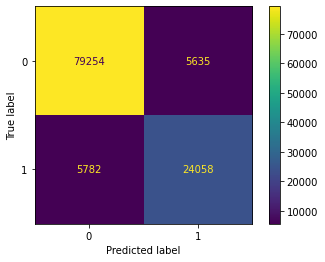

In [46]:
#Plot de la matriz de confusión usando la librería sklearn
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gs, X_test, y_test)  
plt.show() 

**Accuracy**

In [47]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predicted_labels)

0.9004872351367135

Accuracy mide cómo nos va en aciertos tanto negativos como positivos. Mientras más cercano a 1 quiere decir que se tuvieron más aciertos y obtuvimos 0.90 de accuracy. No se sugiere ocupar accuracy para medir el desempeño porque casi nunca van a estar balanceados los data sets y hace más difícil encontrar un 1 que un 0.

**Curva Precision-Recall**

In [48]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds_2 = precision_recall_curve(y_test, predicted_scores[:,1])

(precision, recall, thresholds_2)

(array([0.26282644, 0.26281995, 0.26282226, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99966488e-01, 9.99966488e-01, ...,
        6.70241287e-05, 3.35120643e-05, 0.00000000e+00]),
 array([6.68960908e-04, 6.68973922e-04, 6.68984960e-04, ...,
        9.99452568e-01, 9.99521891e-01, 9.99630280e-01]))

In [49]:
(precision.shape, recall.shape, thresholds_2.shape)

((113536,), (113536,), (113535,))

In [50]:
# agregaremos a los thresholds un punto más para que cuadren
thresholds_2 = np.append(thresholds_2, 1)

In [51]:
(precision.shape, recall.shape, thresholds_2.shape)

((113536,), (113536,), (113536,))

<Figure size 432x288 with 0 Axes>

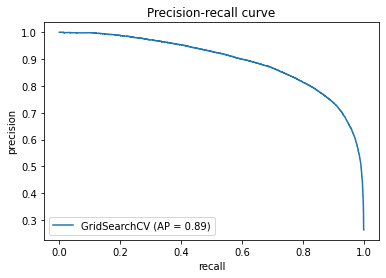

In [52]:
from sklearn.metrics import plot_precision_recall_curve

plt.clf()
plot_precision_recall_curve(gs, X_test, y_test)
plt.title("Precision-recall curve")
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

**Para un precision de 70% se tiene como un 93% de recall**

In [53]:
from sklearn.metrics import f1_score

f1_score = f1_score(y_test, predicted_labels, labels=[0,1],  pos_label=1)
f1_score

0.8082240102128232

### Tabla de métricas de desempeño

In [54]:
def get_metrics_report(fpr, tpr, thresholds, precision, recall, thresholds_2):
    df_1 = pd.DataFrame({'threshold': thresholds_2,'precision': precision,
                    'recall': recall})
    df_1['f1_score'] = 2 * (df_1.precision * df_1.recall) / (df_1.precision + df_1.recall)
    
    df_2 = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'threshold': thresholds})
    df_2['tnr'] = 1 - df_2['fpr']
    df_2['fnr'] = 1 - df_2['tpr']
    
    df = df_1.merge(df_2, on="threshold")
    
    return df

In [55]:
metrics_report = get_metrics_report(fpr, tpr, thresholds, precision, recall, thresholds_2)
metrics_report.head(3)

,threshold,precision,recall,f1_score,tpr,fpr,tnr,fnr
0,0.000669,0.262826,1.000000,0.416251,1.000000,0.985935,0.014065,0.000000
1,0.000669,0.262820,0.999966,0.416240,0.999966,0.985935,0.014065,0.000034
2,0.001098,0.275815,0.999966,0.432371,0.999966,0.922923,0.077077,0.000034


 ### Test Data

In [56]:
#read in test data
test = pd.read_csv("/Users/Shanti/Desktop/test_data.csv")

In [58]:
test.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-02-19,0.631315,0.001912,0.010728,0.814497,0.007547,0.168651,0.009971,0.002347,...,NaN,NaN,NaN,NaN,0.004669,NaN,NaN,NaN,0.008281,NaN
1,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-03-25,0.587042,0.005275,0.011026,0.810848,0.001817,0.241389,0.000166,0.009132,...,NaN,NaN,NaN,0.000142,0.004940,0.009021,NaN,0.003695,0.003753,0.001460
2,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-04-25,0.609056,0.003326,0.016390,1.004620,0.000114,0.266976,0.004196,0.004192,...,NaN,NaN,NaN,0.000074,0.002114,0.004656,NaN,0.003155,0.002156,0.006482
3,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-05-20,0.614911,0.009065,0.021672,0.816549,0.009722,0.188947,0.004123,0.015325,...,NaN,NaN,NaN,0.004743,0.006392,0.002890,NaN,0.006044,0.005206,0.007855
4,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-06-15,0.591673,0.238794,0.015923,0.810456,0.002026,0.180035,0.000731,0.011281,...,NaN,NaN,NaN,0.008133,0.004329,0.008384,NaN,0.001008,0.007421,0.009471


In [57]:
#predict on test with gs 
submission_pred = gs.predict(test)
submission_pred.head(5)

ValueError: could not convert string to float: '00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7'